# 4장 셀프 주유소는 정말 저렴할까?

* 질문: 셀프 주유소는 정말 저렴할까?
* 답변: 주유소의 가격을 조사해서 셀프 주유소와 아닌 주유소를 구분해서 비교하면 된다.


* Fact Check
    * 내용이 사실인지 데이터 분석을 통해 확인


* 주유소의 가격을 비교하는 정부 사이트
    * https://www.opinet.co.kr
    * 주유소/충전소 찾기 -> 지역별
        * 지역정보를 선택하고 조회버튼을 눌러도 웹 브라우저 상의 주소가 바뀌지 않는다.
        * 이렇게 접근 주소가 없으면 Beautiful Soup에서 처리할 수 없다.
        * 이럴 때 selenium을 사용

## 4-1. Selenium 사용하기

* 주로 웹앱을 테스트하는 데 이용하는 프레임워크
* 웹 드라이버라는 API를 통해 운영체제에 설치된 크롬 등의 브라우저를 제어
* selenium의 버전은 자주 업데이트되고 브라우저의 업데이트마다 새로운 드라이버를 잡아주기 때문에 항상 최신버전으로 업데이트한다.

%% 크롬 웹 드라이버

* 크롬 드라이버 설치
    * https://chromedriver.chromium.org/downloads
    * support chrome v버전 확인
* chrome driver 다운로드
    * 구글 검색
        * ChromeDriver 83' -> chromedriver win32.zip 다운로드 -> 압축 해제
        * /driver/chromedriver.exe

In [1]:
# selenium 설치 여부 확인

from selenium import webdriver

In [3]:
# selenium을 사용하여 크롬 창을 여는 것
# 이때, 크롬드라이버가 필요하다.

driver = webdriver.Chrome('C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/driver/chromedriver.exe')
driver.get("http://naver.com")

* 현재 최신 크롬드라이버의 명령 중 일부가 다른 버전과 다른 듯합니다.
* 한 단계 낮은 버전 다운로드

In [5]:
# 크롬창을 스크린샷
driver.save_screenshot('C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/images/opinet.png')

True

In [11]:
# 'id'라는 요소를 찾아서
elem_login = driver.find_element_by_id('id')

# 무엇인가 적혀 있다면 창을 비우고
elem_login.clear()

# 내 아이디를 전송하는 코드
elem_login.send_keys("******")  # 내 아이디 입력

# 비밀번호를 적는 칸을 찾아서
elem_login = driver.find_element_by_id('pw')

# 무엇인가 적혀 있다면 창을 비우고
elem_login.clear()

# send_keys : 내 비밀번호를 전송하는 코드
elem_login.send_keys("******")  # 내 비밀번호 입력

In [12]:
# 로그인 버튼을 검사하여서 xpath를 복사한다.
# xpath를 입력해 주면 로그인 버튼이 클릭된다.

# xpath = '//*[@id="log.login"]'  # 옛날 방식(copy xpath)
xpath = '/html/body/div[1]/div[3]/div/form/fieldset/input'  # copy full xpath

driver.find_element_by_xpath(xpath).click()

In [13]:
# '메일'로 경로 옮기기
driver.get('http://mail.naver.com')

In [14]:
from bs4 import BeautifulSoup

# 현재 있는 페이지의 소스코드를 불러와서 BS로 읽는다.
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
soup

<html lang="ko"><head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/css/mail2_le.min.200716.css" rel="stylesheet" type="text/css"/>
<link href="/css/mail_skin.min.200716.css" rel="stylesheet" type="text/css"/>
<link href="//ssl.pstatic.net" rel="dns-prefetch"/>
<link href="//lcs.naver.com" rel="dns-prefetch"/>
<link href="//cc.naver.com" rel="dns-prefetch"/>
<link href="//static.nid.naver.com" rel="dns-prefetch"/>
<link href="//phinf.pstatic.net" rel="dns-prefetch"/>
<link href="/css/mail_me.min.200716.css" rel="stylesheet" type="text/css"/>
<link href="/favicon.ico?2" rel="shortcut icon"/>
<title>받은메일함 : 네이버 메일</title>
<script type="text/javascript">
		
		
		
		var gnb_service = "mail";
		var gnb_logout = "http://www.naver.com";
		var gnb_template = "gnb_utf8";
		var gnb_brightness = 3;
		var gnb_item_hide_option = 8;
		var gnb_one_naver = 1;
		
		
	</script>
<style type="text/css">
			.skin_co

In [17]:
# div 태그의 class='name _ccr(lst.from)'을 모두 찾는다.

raw_list = soup.find_all('div', 'name _ccr(lst.from)')
raw_list

[<div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|58067) _stopDefault" href="#" title='"박인숙" &lt;pis56@sejong.ac.kr&gt;'>박인숙</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|58066) _stopDefault" href="#" title='"박인숙" &lt;pis56@sejong.ac.kr&gt;'>박인숙</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|58065) _stopDefault" href="#" title='"GitGuardian" &lt;security@mail.gitguardian.com&gt;'>GitGuardian</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|58054) _stopDefault" href="#" title='"박인숙" &lt;pis56@sejong.ac.kr&gt;'>박인숙</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|58053) _stopDefault

In [18]:
# name _ccr(lst.from)에서 나온 개수만큼 for문을 돌려서
# 보낸사람 이름을 모두 뽑아낸다.

send_list = [raw_list[n].find('a').get_text() for n in range(0, len(raw_list))]
send_list

['박인숙',
 '박인숙',
 'GitGuardian',
 '박인숙',
 '박인숙',
 '이 이메일로 답장을 보..',
 '박인숙',
 '온오프믹스',
 'GitHub',
 'GitHub',
 '박인숙',
 '이 이메일로 답장을 보..',
 '박인숙',
 '이 이메일로 답장을 보..',
 '박인숙']

In [19]:
driver.close()  # 웹페이지 종료

## 4-2 서울시 구별 주유소 가격 정보 얻기

In [20]:
# 크롬창으로 opinet 페이지를 연다.
driver = webdriver.Chrome('C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/driver/chromedriver.exe')
driver.get('http://www.opinet.co.kr/')

* Opinet은 사용자가 접속한 지역에 따라 지역을 잡아주는 기능이 있습니다.
* 이 기능을 배려하지 않고 코드가 짜여졌습니다.

* 지역에 __서울__이라고 나타나지 않으면 크롬 드라이버에서 손으로 __서울__로 잡아주세요.

In [45]:
# 지역선택상자를 '서울'로 맞추고 '구' 선택상자의 xpath를 복사한다.
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")

# ''서울'의 '구'가 담겨 있는 'option' 태그를 모두 찾는다.
# 여기서 selenium은 복수형으로 elements를 써 주어야 find_all과 같은 일을 한다.
# element라고 적으면 1개만 찾는다.
gu_list = gu_list_raw.find_elements_by_tag_name('option')

In [46]:
# 구 리스트에 담긴 value값들을 추출
gu_names = [option.get_attribute("value") for option in gu_list]
# ''을 제거
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [58]:
# 구 option에서 값을 1개 찾는다.
element = driver.find_element_by_id("SIGUNGU_NM0")

# 0번째 값을 구 선택상자에 입력한다.
element.send_keys(gu_names[0])

In [64]:
# '조회' 버튼을 클릭하는 xpath
#xpath = "//*[@id="searRgSelect"]"
element_sel_gu = driver.find_element_by_xpath('//*[@id="searRgSelect"]').click()

In [75]:
# '엑셀저장'을 클릭하는 xpath
#xpath = "//*[@id="glopopd_excel"]"
element_get_excel = driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()

# 다운로드에 지역_위치별(주유소).xls로 저장됨

In [76]:
import time
# 진행 정도를 표시해 주는 tqdm
from tqdm.notebook import tqdm

# gu_names에 들어있는 구 이름 수만큼 반복문을 돌려준다.
for gu in tqdm(gu_names):
    # for문에 있는 구 이름이 1개씩 들어간다.
    element = driver.find_element_by_id('SIGUNGU_NM0')  # 'NM0'에서 0은 숫자
    element.send_keys(gu)
    
    time.sleep(2) # 1회 반복이 끝날 때마다 2초 쉼
    
    # '조회' 버튼 클릭
    xpath = """//*[@id="searRgSelect"]"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)  # 조회 후 1초 쉼
    
    # '엑셀저장' 버튼 클릭
    #xpath = """//*[@id="glopopd_excel"]"""
    element_get_excel = driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()
    
    time.sleep(1)
    
    # 모든 반복이 끝나면 서울에 있는 모든 구들의 주유소 위치가 엑셀로 저장된다.
    # 수업 중에는 저장이 안 되었음.

## 4-3 구별 주유 가격에 대한 데이터의 정리

In [32]:
import pandas as pd
from glob import glob

# glob 모듈은 유닉스 셀이 사용하는 규칙에 따라 지정된 패턴과 일치하는 모든 경로명을 찾는다.
# 하지만 결과는 임의의 순서로 반환된다.

In [77]:
glob('C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData/*.xls')

['C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (1).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (10).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (11).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (12).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (13).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (14).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (15).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (16).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (17).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (18).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (19).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (2).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (20).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_

In [79]:
# stations_files 변수에 각 엑셀 파일의 경로와 이름을 리스트로 저장

stations_files = glob('C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData/*.xls')
stations_files

['C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (1).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (10).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (11).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (12).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (13).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (14).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (15).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (16).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (17).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (18).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (19).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (2).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_위치별(주유소) (20).xls',
 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/xlsData\\지역_

In [80]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [81]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 41
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      499 non-null    object
 1   상호      499 non-null    object
 2   주소      499 non-null    object
 3   상표      499 non-null    object
 4   전화번호    499 non-null    object
 5   셀프여부    499 non-null    object
 6   고급휘발유   499 non-null    object
 7   휘발유     499 non-null    object
 8   경유      499 non-null    object
 9   실내등유    499 non-null    object
dtypes: object(10)
memory usage: 42.9+ KB


In [82]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1414,1217,-
1,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1615,1415,1219,-
2,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1415,1225,-
3,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,1673,1419,1225,-
4,서울특별시,현대오일뱅크㈜직영 고속셀프주유소,서울 강동구 천호대로 1246,현대오일뱅크,02-487-2030,Y,1598,1425,1225,895


In [83]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'],
                        '주소':station_raw['주소'],
                        '가격':station_raw['휘발유'],
                        '셀프':station_raw['셀프여부'],
                        '상표':station_raw['상표']})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1414,N,현대오일뱅크
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1415,N,GS칼텍스
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1415,Y,GS칼텍스
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1419,Y,현대오일뱅크
4,현대오일뱅크㈜직영 고속셀프주유소,서울 강동구 천호대로 1246,1425,Y,현대오일뱅크


In [84]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1414,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1415,N,GS칼텍스,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1415,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1419,Y,현대오일뱅크,강동구
4,현대오일뱅크㈜직영 고속셀프주유소,서울 강동구 천호대로 1246,1425,Y,현대오일뱅크,강동구


In [85]:
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [86]:
stations[stations['구']=='서울특별시']

,Oil_store,주소,가격,셀프,상표,구


In [87]:
stations.loc[stations['구']=='서울특별시', '구'] = '성동구'
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [88]:
stations[stations['구']=='특별시']

,Oil_store,주소,가격,셀프,상표,구


In [89]:
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구
12,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
35,전당앞주유소,서울 서초구 남부순환로 2391 (서초동),-,N,SK에너지,서초구
16,현대오일뱅크 성수주유소,서울 성동구 뚝섬로 352 (성수동1가),-,N,현대오일뱅크,성동구
23,신동방주유소,서울 성북구 월계로 84 (장위동),-,N,S-OIL,성북구
30,성락주유소,서울 영등포구 가마산로 414 (신길동),-,Y,S-OIL,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
14,양지진흥개발(주)상계주유소,서울 노원구 노해로 527 (상계동),-,N,SK에너지,노원구
40,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
41,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구


In [92]:
stations = stations[stations['가격']!='-']
stations

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1414,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1415,N,GS칼텍스,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1415,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1419,Y,현대오일뱅크,강동구
4,현대오일뱅크㈜직영 고속셀프주유소,서울 강동구 천호대로 1246,1425,Y,현대오일뱅크,강동구
...,...,...,...,...,...,...
35,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),1839,N,GS칼텍스,강남구
36,현대오일뱅크㈜직영 삼성동주유소,서울 강남구 테헤란로 619 (삼성동),1839,N,현대오일뱅크,강남구
37,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),1869,N,GS칼텍스,강남구
38,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335 (대치동),1893,N,GS칼텍스,강남구


In [93]:
# 가격 정보가 숫자형으로 변환되지 않아 float형으로 변경

stations['가격'] = [float(value) for value in stations['가격']]

In [94]:
# 25개의 엑셀을 합쳤기 때문에 index가 중복될 수 있으므로 reset_index 명령으로 인덱스를 처음부터 다시 부여
stations.reset_index(inplace=True)
del stations['index']

In [95]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  490 non-null    object 
 1   주소         490 non-null    object 
 2   가격         490 non-null    float64
 3   셀프         490 non-null    object 
 4   상표         490 non-null    object 
 5   구          490 non-null    object 
dtypes: float64(1), object(5)
memory usage: 23.1+ KB


In [96]:
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1414.0,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1415.0,N,GS칼텍스,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1415.0,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1419.0,Y,현대오일뱅크,강동구
4,현대오일뱅크㈜직영 고속셀프주유소,서울 강동구 천호대로 1246,1425.0,Y,현대오일뱅크,강동구


## 4-4 셀프 주유소는 정말 저렴한지 boxplot으로 확인하기

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~')

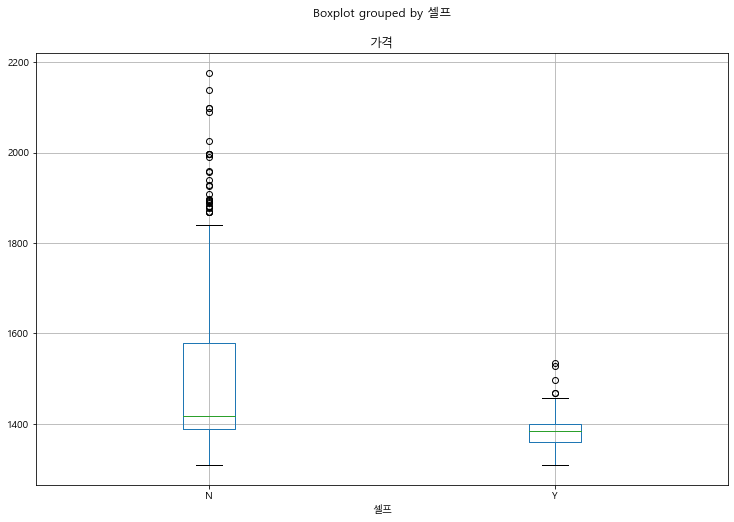

In [100]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8));

# 전반적으로 셀프 주유소의 경우 가격이 낮게 책정되어 있다.

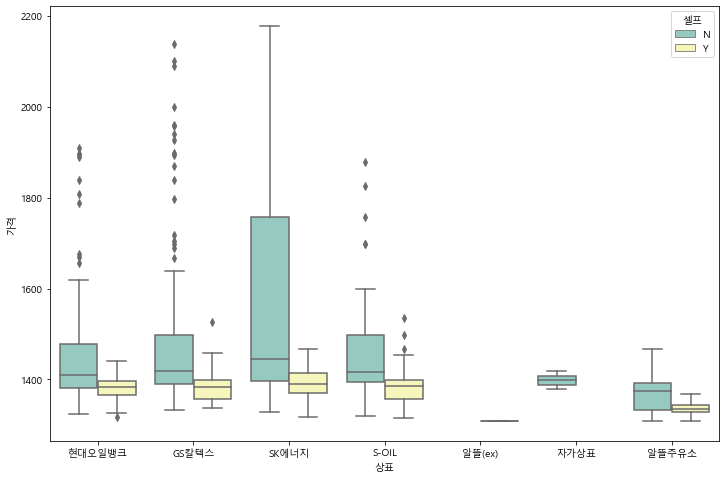

In [101]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

# 현대오일뱅크, GS칼텍스, S-Oil, SK에너지 모두 셀프 주유소가 저렴
# SK에너지는 그중 가격대가 가장 높게 형성

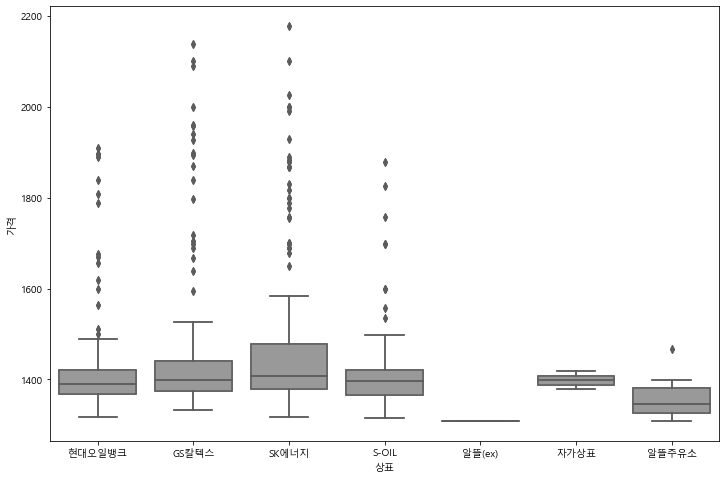

In [104]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
sns.boxplot(x="상표", y="가격", data=stations, color=" .6")
plt.show()

# 셀프 주유소 말고 상표별 데이터를 확인했는데 SK에너지가 높은 가격대를 형성하는 주유소가 많았고
# 전반적으로 현대오일뱅크가 4대 주유 브랜드 중에서는 저렴하다는 것을 확인

In [105]:
# 최종 결론은 셀프 주유소는 대체로 저렴하다는 분석 결과

## 4-5 서울시 구별 주유 가격 확인하기

In [107]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [108]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
300,서남주유소,서울 중구 통일로 30,2177.0,N,SK에너지,중구
299,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2138.0,N,GS칼텍스,중구
298,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2099.0,N,SK에너지,중구
297,필동주유소,서울 중구 퇴계로 196 (필동2가),2099.0,N,GS칼텍스,중구
263,서계주유소,서울 용산구 청파로 367 (서계동),2089.0,N,GS칼텍스,용산구
489,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025.0,N,SK에너지,강남구
261,한남지점,서울 용산구 한남대로21길 4 (한남동),1998.0,N,SK에너지,용산구
262,에너비스,서울 용산구 한남대로 82 (한남동),1998.0,N,SK에너지,용산구
288,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,1998.0,N,SK에너지,종로구
287,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1998.0,N,GS칼텍스,종로구


In [109]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
317,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1308.0,Y,알뜰주유소,강서구
318,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1308.0,N,알뜰주유소,강서구
75,만남의광장주유소,서울 서초구 양재대로12길 73-71,1309.0,Y,알뜰(ex),서초구
182,현대주유소,서울 양천구 남부순환로 372 (신월동),1316.0,Y,S-OIL,양천구
239,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1317.0,Y,S-OIL,강북구
319,강서오곡셀프주유소,서울 강서구 벌말로 254 (오곡동),1317.0,Y,SK에너지,강서구
238,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1317.0,Y,현대오일뱅크,강북구
383,처음처럼주유소,서울 구로구 오리로 1299 (궁동),1319.0,N,S-OIL,구로구
126,원천주유소,서울 성북구 돌곶이로 142 (장위동),1319.0,N,알뜰주유소,성북구
184,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1325.0,Y,SK에너지,양천구


In [110]:
import numpy as np

gu_data = pd.pivot_table(stations, index=["구"], values=["가격"], aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1571.3500
강동구,1467.0000
강북구,1357.5000
강서구,1390.0000
관악구,1422.5625


In [112]:
geo_path = 'C:/Users/Slim3 15IIL/Desktop/0-2020데청캠/data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
              data = gu_data,
              columns=[gu_data.index, '가격'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

map

## 4-6 서울시 주유 가격 상하위 10개 주유소 지도에 표기하기

In [116]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
300,서남주유소,서울 중구 통일로 30,2177.0,N,SK에너지,중구
299,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2138.0,N,GS칼텍스,중구
298,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2099.0,N,SK에너지,중구
297,필동주유소,서울 중구 퇴계로 196 (필동2가),2099.0,N,GS칼텍스,중구
263,서계주유소,서울 용산구 청파로 367 (서계동),2089.0,N,GS칼텍스,용산구
489,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025.0,N,SK에너지,강남구
261,한남지점,서울 용산구 한남대로21길 4 (한남동),1998.0,N,SK에너지,용산구
262,에너비스,서울 용산구 한남대로 82 (한남동),1998.0,N,SK에너지,용산구
288,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,1998.0,N,SK에너지,종로구
287,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1998.0,N,GS칼텍스,종로구


In [117]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
317,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1308.0,Y,알뜰주유소,강서구
318,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1308.0,N,알뜰주유소,강서구
75,만남의광장주유소,서울 서초구 양재대로12길 73-71,1309.0,Y,알뜰(ex),서초구
182,현대주유소,서울 양천구 남부순환로 372 (신월동),1316.0,Y,S-OIL,양천구
239,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1317.0,Y,S-OIL,강북구
319,강서오곡셀프주유소,서울 강서구 벌말로 254 (오곡동),1317.0,Y,SK에너지,강서구
238,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1317.0,Y,현대오일뱅크,강북구
383,처음처럼주유소,서울 구로구 오리로 1299 (궁동),1319.0,N,S-OIL,구로구
126,원천주유소,서울 성북구 돌곶이로 142 (장위동),1319.0,N,알뜰주유소,성북구
184,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1325.0,Y,SK에너지,양천구


In [118]:
gmaps_key="********"  # 2장에서 구한 자신의 key를 입력
gmaps=googlemaps.Client(key=gmaps_key)

In [119]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
        
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

C:\Users\Slim3 15IIL\anaconda3\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


,Oil_store,주소,가격,셀프,상표,구,lat,lng
300,서남주유소,서울 중구 통일로 30,2177.0,N,SK에너지,중구,37.558348,126.972090
299,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2138.0,N,GS칼텍스,중구,37.557001,126.974495
298,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2099.0,N,SK에너지,중구,37.561648,126.997142
297,필동주유소,서울 중구 퇴계로 196 (필동2가),2099.0,N,GS칼텍스,중구,37.560850,126.993653
263,서계주유소,서울 용산구 청파로 367 (서계동),2089.0,N,GS칼텍스,용산구,37.552290,126.968935
489,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025.0,N,SK에너지,강남구,37.517636,127.035756
261,한남지점,서울 용산구 한남대로21길 4 (한남동),1998.0,N,SK에너지,용산구,37.534657,127.006063
262,에너비스,서울 용산구 한남대로 82 (한남동),1998.0,N,SK에너지,용산구,37.535952,127.006130
288,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,1998.0,N,SK에너지,종로구,37.586068,127.001058
287,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1998.0,N,GS칼텍스,종로구,37.574464,126.966618


In [120]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = str(oil_price_bottom10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
        
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

C:\Users\Slim3 15IIL\anaconda3\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


,Oil_store,주소,가격,셀프,상표,구,lat,lng
317,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1308.0,Y,알뜰주유소,강서구,37.540657,126.841506
318,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1308.0,N,알뜰주유소,강서구,37.531554,126.856024
75,만남의광장주유소,서울 서초구 양재대로12길 73-71,1309.0,Y,알뜰(ex),서초구,37.459906,127.042060
182,현대주유소,서울 양천구 남부순환로 372 (신월동),1316.0,Y,S-OIL,양천구,37.533811,126.829240
239,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1317.0,Y,S-OIL,강북구,37.640155,127.017203
319,강서오곡셀프주유소,서울 강서구 벌말로 254 (오곡동),1317.0,Y,SK에너지,강서구,37.555284,126.768567
238,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1317.0,Y,현대오일뱅크,강북구,37.631582,127.017939
383,처음처럼주유소,서울 구로구 오리로 1299 (궁동),1319.0,N,S-OIL,구로구,37.497354,126.828954
126,원천주유소,서울 성북구 돌곶이로 142 (장위동),1319.0,N,알뜰주유소,성북구,37.614921,127.052752
184,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1325.0,Y,SK에너지,양천구,37.528087,126.832981


In [122]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]],
                           radius=15, color='#CD3181',
                           fill_color='#CD3181').add_to(map)
        
    for n in oil_price_bottom10.index:
        if pd.notnull(oil_price_bottom10['lat'][n]):
            folium.CircleMarker([oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]],
                                radius=15, color='#3186cc',
                                fill_color='#3186cc').add_to(map)
        
map